In [1]:
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/global/homes/m/mehdi/github/DESILSS')

In [3]:
import healpy as hp

In [2]:
import numpy as np

In [6]:
from time import time
from cl import CLJack

In [7]:
# read elgmap and ranmap
elgmap = hp.read_map('/global/cscratch1/sd/mehdi/dr5_anand/eboss/eBOSS.ELGhpmap.fits')
ranmap = hp.read_map('/global/cscratch1/sd/mehdi/dr5_anand/eboss/eBOSS.ELGRANhpmap.fits')
select_fun = hp.read_map('/global/cscratch1/sd/mehdi/dr5_anand/march22/nn-weights-hpmap256.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [8]:
mask = ranmap > 0.2

In [9]:
cljack = CLJack(elgmap, ranmap, select_fun, mask)
cljack.run()

sample0 done in 6.7012717723846436 s
sample1 done in 4.8863725662231445 s
sample2 done in 4.703271865844727 s
sample3 done in 4.6684911251068115 s
sample4 done in 4.6795408725738525 s
sample5 done in 4.689409971237183 s
sample6 done in 4.717240810394287 s
sample7 done in 4.730257987976074 s
sample8 done in 4.639174461364746 s
sample9 done in 4.702289342880249 s
sample10 done in 4.706938982009888 s
sample11 done in 4.6465654373168945 s
sample12 done in 4.657366514205933 s
sample13 done in 4.678955793380737 s
sample14 done in 4.665701150894165 s
sample15 done in 4.703024864196777 s
sample16 done in 4.677277088165283 s
sample17 done in 4.833925008773804 s
sample18 done in 4.677294731140137 s
sample19 done in 4.690349817276001 s


In [41]:
ls /global/cscratch1/sd/mehdi/dr5_anand/march22/

dr5_4fold/
lin-weights-hpmap256.fits
lin-weights-nside256.fits
nn-weights-hpmap256.fits
nn-weights-nside256.fits
w_buggy_airmass_seeing-lin-weights-nside256.fits
w_buggy_airmass_seeing-nn-weights-nside256.fits
xi-cl-dr5_jackerr_lin.npy
xi-cl-dr5_jackerr_nn.npy
xi-cl-dr5_jackerr_uni.npy
xi-cl-dr5_lin-jack.npy
xi-cl-dr5_lin.npy
xi-cl-dr5_nn-jack.npy
xi-cl-dr5_nn.npy
xi-cl-dr5_uni-jack.npy
xi-cl-dr5_uni.npy
xi-cl-uni-lin-nn.npy
xi-dr5-jack1024-lin.npy
xi-dr5-jack1024-nn.npy
xi-dr5-jack1024-uni.npy
xi-dr5-jack256-lin.npy
xi-dr5-jack256-nn.npy
xi-dr5-jack256-uni.npy
xi-ngalnstar-dr5-jack256-lin.npy
xi-ngalnstar-dr5-jack256-nn.npy
xi-ngalnstar-dr5-jack256-uni.npy
xi-ngalnstar-dr5_lin-jack.npy
xi-ngalnstar-dr5_nn-jack.npy
xi-ngalnstar-dr5_uni-jack.npy


In [10]:
cljack.output.keys()

dict_keys(['cells', 'xil', 'celm', 'celerr', 'theta', 'xim', 'xierr', 'njack', 'nside'])

In [42]:
np.save('/global/cscratch1/sd/mehdi/dr5_anand/march22/cl-dr5-jack256-nn.npy', cljack.output)

In [81]:
cljacks = np.load('/global/cscratch1/sd/mehdi/dr5_anand/march22/cl-dr5-jack256-nn.npy').item()
cls = cljacks['cells']
len(cls), type(cls), cls.keys()

(21,
 dict,
 dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, -1]))

In [5]:
results = np.load('/global/cscratch1/sd/mehdi/dr5_anand/march22/xi-cl-uni-lin-nn.npy')

In [6]:
clt = np.loadtxt('/global/cscratch1/sd/mehdi/dr5_anand/eboss/ebossELG.dat', usecols=(0,1))

[   1.33369607    2.22379433    3.70793717    6.18258527   10.30879403
   17.18880207   28.66047335   47.78824779   79.68174841  132.86072045
  221.53092005  369.3789133 ]
[   1.33369607    2.22379433    3.70793717    6.18258527   10.30879403
   17.18880207   28.66047335   47.78824779   79.68174841  132.86072045
  221.53092005  369.3789133 ]
[   1.33369607    2.22379433    3.70793717    6.18258527   10.30879403
   17.18880207   28.66047335   47.78824779   79.68174841  132.86072045
  221.53092005  369.3789133 ]


Text(0,0.5,'C$_{l}$')

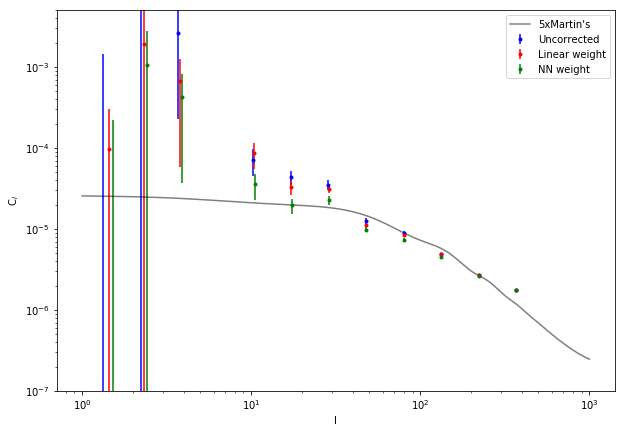

In [12]:
def binner3(l, cl, fsky, lbins):
    w = 2*l+1
    x  = []
    y  = []
    ye = []
    args = np.digitize(l, lbins)
    bl = args.min()
    bu = args.max()
    for i in range(1, bu):
        m   = args == i
        cm = np.sum( w[m]*cl[m]) / np.sum(w[m])
        y.append(cm)
        x.append(0.5*(lbins[i-1]+lbins[i]))
        #x.append( np.sum(w[m] * l[m])/np.sum(w[m]))
        ye.append(cm / np.sqrt(np.sum(w[m]) * 0.5 * fsky))
    
    clbins = np.array(y)
    error  = np.array(ye)
    errorm = np.copy(error)
    errorm[error >= clbins] = clbins[error >= clbins]*0.99999
    return np.array(x), clbins, [errorm, error]
    

def scatterit(l, cl, bins, shift=0, **kwargs):
#     cly  = cl / np.sqrt((2*np.arange(cl.size)+1)*0.15/2)
#     ax.errorbar(l+shift, cl, yerr=cly, linestyle='None', **kwargs)
    lb, clb, yclb = binner3(l, cl, 0.15, bins)
    print(lb)
    plt.errorbar(lb+shift, clb, yerr=yclb, linestyle='None', **kwargs)
#     ax.scatter(l, cl, **kwargs, alpha=0.2)
c = ['blue', 'red', 'green']
names = ['Uncorrected','Linear weight', 'NN weight']
plt.figure(figsize=(10,7))
#plt.title('Cl with Gaussian Errorbars, logarithmic binning, different weights')
for i,result_i in enumerate(results):
    l,cl = result_i['cl']
    scatterit(l, cl,np.logspace(0, np.log10(770), 14), shift=0.1*i, marker='.', label=names[i], color=c[i])
#    plt.scatter(l, cl-np.median(cl[-20:]), 1.0)
plt.plot(clt[:,0], 5*clt[:,1], color='k', alpha=0.5, label="5xMartin's")  
plt.legend()
plt.xscale('log')
plt.ylim([1.e-7, 5.e-3])
plt.yscale('log')
plt.xlabel('l')
plt.ylabel(r'C$_{l}$')
# plt.savefig('./figs/cl-dr5-theory256.pdf', bbox_inches='tight')

[   1.            2.            3.5625        6.1025641    10.19047619
   17.38095238   29.06034483   48.49826389   81.165625    135.80149813
  226.04166667  376.71853857]
[   1.            2.            3.5625        6.1025641    10.19047619
   17.38095238   29.06034483   48.49826389   81.165625    135.80149813
  226.04166667  376.71853857]
[   1.            2.            3.5625        6.1025641    10.19047619
   17.38095238   29.06034483   48.49826389   81.165625    135.80149813
  226.04166667  376.71853857]


Text(0,0.5,'C$_{l}$')

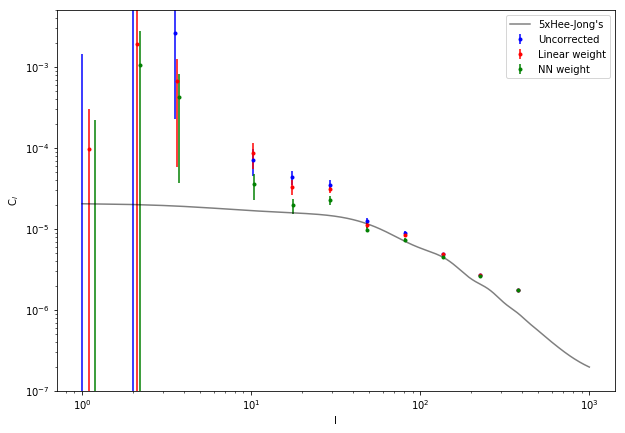

In [97]:
def binner2(l, cl, fsky, lbins):
    w = 2*l+1
    x  = []
    y  = []
    ye = []
    args = np.digitize(l, lbins)
    bl = args.min()
    bu = args.max()
    for i in range(1, bu):
        m   = args == i
        cm = np.sum( w[m]*cl[m]) / np.sum(w[m])
        y.append(cm)
        #x.append(0.5*(lbins[i-1]+lbins[i]))
        x.append( np.sum(w[m] * l[m])/np.sum(w[m]))
        ye.append(cm / np.sqrt(np.sum(w[m]) * 0.5 * fsky))
    
    clbins = np.array(y)
    error  = np.array(ye)
    errorm = np.copy(error)
    errorm[error >= clbins] = clbins[error >= clbins]*0.99999
    return np.array(x), clbins, [errorm, error]
    

def scatterit(l, cl, bins, shift=0, **kwargs):
#     cly  = cl / np.sqrt((2*np.arange(cl.size)+1)*0.15/2)
#     ax.errorbar(l+shift, cl, yerr=cly, linestyle='None', **kwargs)
    lb, clb, yclb = binner2(l, cl, 0.15, bins)
    print(lb)
    plt.errorbar(lb+shift, clb, yerr=yclb, linestyle='None', **kwargs)
#     ax.scatter(l, cl, **kwargs, alpha=0.2)
c = ['blue', 'red', 'green']
names = ['Uncorrected','Linear weight', 'NN weight']
plt.figure(figsize=(10,7))
#plt.title('Cl with Gaussian Errorbars, logarithmic binning, different weights')
for i,result_i in enumerate(results):
    l,cl = result_i['cl']
    scatterit(l, cl,np.logspace(0, np.log10(770), 14), shift=0.1*i, marker='.', label=names[i], color=c[i])
#    plt.scatter(l, cl-np.median(cl[-20:]), 1.0)
plt.plot(clt[:,0], 4*clt[:,1], color='k', alpha=0.5, label="5xHee-Jong's")  
plt.legend()
plt.xscale('log')
plt.ylim([1.e-7, 5.e-3])
plt.yscale('log')
plt.xlabel('l')
plt.ylabel(r'C$_{l}$')
# plt.savefig('./figs/cl-dr5-theory256.pdf', bbox_inches='tight')

Text(0,0.5,'Cl')

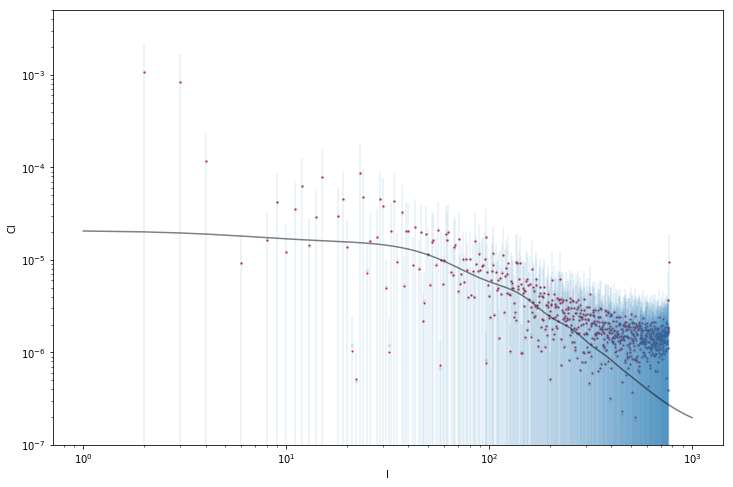

In [82]:
def binner2(l, cl, w, lbins):
    x  = []
    y  = []
    ye = []
    args = np.digitize(l, lbins)
    bl = args.min()
    bu = args.max()
    for i in range(1, bu):
        m   = args == i
        cm = np.sum(w[m]*cl[m]) / np.sum(w[m])
        y.append(cm)
        x.append(0.5*(lbins[i-1]+lbins[i]))
        ye.append(1. / np.sqrt(np.sum(w[m])))
    
    clbins = np.array(y)
    error  = np.array(ye)
    errorm = np.copy(error)
    errorm[error >= clbins] = clbins[error >= clbins]*0.99999
    return np.array(x), clbins, [errorm, error]

# for i, result_i in enumerate(results):
l,cl = results[2]['cl']
plt.figure(figsize=(12,8))
plt.scatter(l, cl, 1.0, c='r')
plt.plot(clt[:,0], 4*clt[:,1], color='k', alpha=0.5)

cl = cljacks['celm']
clerr = cljacks['celm']
# lb, clb, clyb = binner2(np.arange(cl.size), cl, (1/clerr)**2, np.logspace(0,3, 18))
# plt.errorbar(lb, clb, yerr=clyb,
#             marker='.', ls='None', alpha=0.5)
plt.errorbar(np.arange(cl.size), cl, yerr=clerr, 
             marker='.', ls='None', alpha=0.1)
plt.xscale('log')
plt.ylim([1.e-7, 5.e-3])
plt.yscale('log')
plt.xlabel('l')
plt.ylabel('Cl')

In [89]:
arg = np.argwhere(cl<0).flatten()
cl[arg]

array([ -1.83094545e-03,  -2.01857522e-04,  -2.71622910e-05,
        -3.39118124e-05,  -2.97675943e-05,  -2.56453638e-07,
        -1.32379800e-05,  -4.30787974e-06,  -1.08157456e-05,
        -4.88524813e-06,  -4.65963705e-07,  -2.09768354e-06,
        -6.66419963e-06,  -1.64205506e-06,  -1.65415270e-06,
        -1.98809802e-06,  -1.85632486e-06,  -1.40996388e-06,
        -1.04667064e-06,  -3.23434224e-06,  -8.58981886e-07,
        -9.46094664e-08,  -6.15003889e-07,  -1.37239764e-07,
        -1.97326591e-17])

In [91]:
arg

array([  0,   1,   5,   7,  16,  17,  27,  36,  41,  44,  54,  64,  69,
        76,  87,  91,  94, 107, 115, 118, 140, 157, 222, 242, 767])

In [10]:
plt.rc('font', family='serif', size=20)
plt.rc('axes.spines', right=False, top=False)

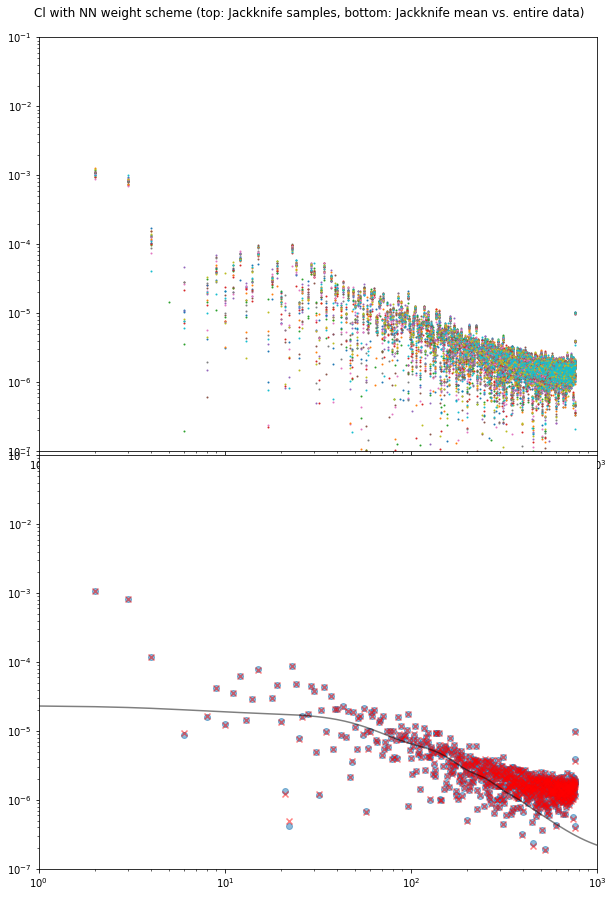

In [12]:
plt.figure(figsize=(10,14))
plt.suptitle('Cl with NN weight scheme (top: Jackknife samples, bottom: Jackknife mean vs. entire data)')
plt.subplot(211)
call = []
for k in range(20):
    call.append(cls[k])
    plt.scatter(np.arange(cls[k].size), cls[k], 1.0)
plt.xscale('log')
plt.yscale('log')
plt.axis([1, 1000, 1.e-7, 1.e-1])
#
plt.subplot(212)
calla = np.mean(np.array(call), axis=0)
plt.scatter(np.arange(calla.size), calla-calla[-1], alpha=0.5)
plt.scatter(np.arange(calla.size), cls[-1]-cls[-1][-1], marker='x', color='r', alpha=0.5)
plt.plot(clt[:,0], 4.5*clt[:,1], color='k', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.axis([1, 1000, 1.e-7, 1.e-1])
plt.subplots_adjust(hspace=0.01, top=0.95)
# plt.xlim(xmin=0.5)
# plt.xscale('log')
# plt.ylim([1.e-7, 1.e-1])
# plt.yscale('log')

(1e-07, 0.005)

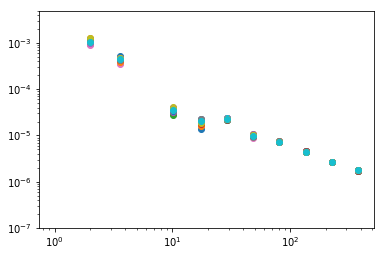

In [32]:
def binit(l, cl, fsky, lbins, xbin='weighted'):
    w = 2*l+1
    x  = []
    y  = []
    ye = []
    args = np.digitize(l, lbins)
    bl = args.min()
    bu = args.max()
    for i in range(1, bu):
        m   = args == i
        cm = np.sum( w[m]*cl[m]) / np.sum(w[m])
        y.append(cm)
        if xbin=='weighted':
            x.append( np.sum(w[m] * l[m])/np.sum(w[m]))
        elif xbin=='mid':
            x.append(0.5*(lbins[i-1]+lbins[i]))
        ye.append(cm / np.sqrt(np.sum(w[m]) * 0.5 * fsky))
    
    clbins = np.array(y)
    error  = np.array(ye)
    errorm = np.copy(error)
    errorm[error >= clbins] = clbins[error >= clbins]*0.99999
    return np.array(x), clbins, [errorm, error]
lbin = np.logspace(0, np.log10(770), 14)
lall = []
call = []
for k in range(20):
    lb, clb, yclb = binit(np.arange(cls[k].size), cls[k], 0.15, lbin)
    call.append(clb)
    lall.append(lb)
    plt.scatter(lb, clb)
plt.xscale('log')
plt.yscale('log')
plt.ylim([1.e-7, 5.e-3])


In [68]:
call = np.array(call)

In [69]:
jm = np.mean(call, axis=0)
je = np.sqrt(19)*np.std(call, axis=0)

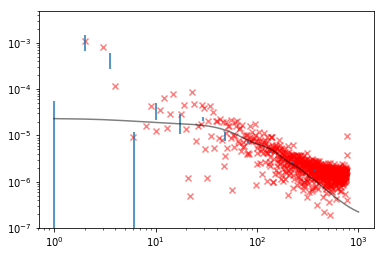

In [70]:
plt.errorbar(lall[0], jm, yerr=je, ls='None')
plt.scatter(np.arange(cls[-1].size), cls[-1], marker='x', color='r', alpha=0.5)
plt.plot(clt[:,0], 4.5*clt[:,1], color='k', alpha=0.5)
plt.ylim([1.e-7, 5.e-3])
plt.xscale('log')
plt.yscale('log')


(1e-07, 0.005)

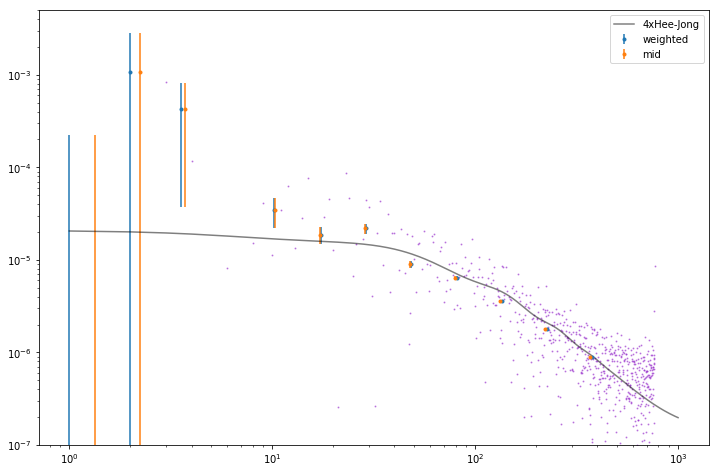

In [95]:
plt.figure(figsize=(12,8))
for w in ['weighted', 'mid']:
    lb, clb, yclb = binit(np.arange(cls[-1].size), cls[-1]-0.09*cls[-1][-2], 0.15, lbin,xbin=w)
    plt.errorbar(lb, clb, yerr=yclb, ls='None', marker='.', label=w)
    if w =='mid':
        plt.scatter(np.arange(cls[-1].size), cls[-1]-0.1*cls[-1][-2], 1.0, alpha=0.5, color='darkorchid')
plt.plot(clt[:,0], 4.*clt[:,1], color='k', alpha=0.5, label='4xHee-Jong')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1.e-7, 5.e-3])